<DIV ALIGN=CENTER>

# Python Data Exploration
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

Python provides a great deal of power and flexibility when exploring a
data set. The standard tool in Python for doing data exploration is currently
[Pandas][pd], which provides a DataFrame data structure, similar to the
_R_ data frame, that simplifies many data access and preparation tasks. In
this lesson, we review some of the basic Pandas functionality that is
useful for exploring data. This includes reading and writing data,
extracting columns, simple data processing, field extraction and
conversion, and advanced data processing tasks.

-----

[pd]: pandas.pydata.org

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", font_scale=2.0)

## Data

The first task when using Python for data exploration is obtaining and
reading the data of interest. Pandas can directly [read Internet
accesible data sets][rwww] (including optional parsing/scraping); or,
alternatively, read local data sets. Since we have already obtained the
airline flight data, we can simply read the CSV data sets that are
already available from our JupyterHub Server (in the `data` directory),
or in our local Docker container (in the
`/home/data_scientist/rppdm/data` directory).

In the following code block, we demonstrate reading the 2001 flight data
into a Pandas data frame from a local Docker container.


-----
[rwww]: http://pandas.pydata.org/pandas-docs/version/0.16.2/io.html#io-read-html

In [2]:
# Change this to read a different file, for example
# /home/data_scientist/data/2001.csv on the JupyterHub Server
#
# Note that the JupyterHub server has data from other years in the raw
# subdirectory.
#
filename = '/home/data_scientist/rppdm/data/2001.csv'

data = pd.read_csv(filename, header = 0, nrows = 10000, encoding='latin-1')

# Now dump out information about the memory usage of this Data Frame
data.memory_usage(index=True)

Index                80000
Year                 80000
Month                80000
DayofMonth           80000
DayOfWeek            80000
DepTime              80000
CRSDepTime           80000
ArrTime              80000
CRSArrTime           80000
UniqueCarrier        80000
FlightNum            80000
TailNum              80000
ActualElapsedTime    80000
CRSElapsedTime       80000
AirTime              80000
ArrDelay             80000
DepDelay             80000
Origin               80000
Dest                 80000
Distance             80000
TaxiIn               80000
TaxiOut              80000
Cancelled            80000
CancellationCode     80000
Diverted             80000
CarrierDelay         80000
WeatherDelay         80000
NASDelay             80000
SecurityDelay        80000
LateAircraftDelay    80000
dtype: int64

-----

This simple statement read in the first 10,000 rows from the `2001.csv`
file, which we indicate is in the `latin-` encoding. In addition, we
specified that the first row (i.w., row zero) contained header
information for each column. The last line displays the data type used
for the columns, as well as the memory used for each column (`int64`
uses eight bytes per value, with 10,000 rows in the DataFrame).

Note that we only read in part of the file in order to simplify data
exploration. The exact value used here is project and system dependent.
In this case we have thirty columns, means we need at least 2.4
Megabytes to simply read in the first 10,000 rows. Since the file has
nearly six millions rows, we can estimate our total memory usage to
nearly 1.5 Gb.

### Memory Management

For simple data exploration, memory management does not need to be a
major concern. However, when faced with limited memory and/or very
large data sets, there are a number of techniques that can be used to
minimize the memory footprint of a data set, while also improving
performance. The simplest approach is to understand the range of values
that a column may contain. For example, the `month` columns spans 1-12,
and thus can be adequately expressed in a single byte integer, likewise
the `Day` column at maximum spans 1-31. The `distance` column is
unlikely to span the maximum value that can be held in a two-byte,
unsigned integer (which is several times larger than the circumference
of the Earth). By carefully quantifying specific data types for each
column, the amount of storage required for the full data frame can be
greatly reduced. 

A second technique is to use a new Pandas feature called 
[_categorical data_][pc],
where text-based columns that are restricted to a limited set of values
can be mapped to integers. A good example of an appropriate use of
categorical data with the flight data would be airport codes (where a
two-byte integer might suffice for encoding all airports).

-----
[pc]: http://pandas.pydata.org/pandas-docs/stable/categorical.html

In [3]:
# We cn check the memory usage in our Docker container
!free -m

             total       used       free     shared    buffers     cached
Mem:          2002        381       1621          5         14         70
-/+ buffers/cache:        295       1706
Swap:         1418        193       1224


## Verifying Data

Pandas provides simple mechanisms for viewing rows at the start and end
of a DataFrame. These functions, in a direct analogy to the Unix command
line, are named `head` and `tail`. Just like their Unix counterparts,
these functions accept arguments to indicate how many rows to display.
For example, in the following code block, the first statement displays
the first five rows of the DataFrame, which is the default; the second
displays only the first two rows; the third statement displays the last
five lines of the DataFrame; and the last statement displays the last
ten rows.

```console
$ data.head()
$ data.head(2)
$ data.tail()
$ data.tail(10)
```

Note that a negative number used in these functions refers to the
opposite end of the DataFrame. Thus, `data.head(-10)` means display all
rows except the last ten.

The following two code blocks demonstrate these functions.

-----

In [4]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2001,1,17,3,1806,1810,1931,1934,US,375,...,5,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2001,1,18,4,1805,1810,1938,1934,US,375,...,9,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2001,1,19,5,1821,1810,1957,1934,US,375,...,6,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2001,1,20,6,1807,1810,1944,1934,US,375,...,4,27,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2001,1,21,7,1810,1810,1954,1934,US,375,...,4,38,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail(7)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
9993,2001,1,15,1,1346,1345,1505,1503,US,746,...,4,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9994,2001,1,16,2,1341,1345,1447,1503,US,746,...,3,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9995,2001,1,17,3,1341,1345,1510,1503,US,746,...,6,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9996,2001,1,18,4,1340,1345,1453,1503,US,746,...,4,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9997,2001,1,19,5,1424,1345,1559,1503,US,746,...,3,42,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9998,2001,1,20,6,1347,1345,1453,1503,US,746,...,5,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9999,2001,1,21,7,1341,1345,1445,1503,US,746,...,2,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN


-----

### Row Selection

We can also select rows directly from a DataFrame by slicing, in the
same way we can slice built-in Python data structures or _numpy_ arrays.
Given an DataFrame `data`, the basic format is `data[start:end:stride]`
where `start` and `end` are the starting and ending index values,
respectively, and `stride` is the number of values to skip when
iterating. If `start` or `end` are omitted, the default is the first and
last value, while the default `stride` is one. A negative value can be
used for either the `start` or the `end` index values, which indicates
counting backwards from the `end` value. These concepts are demonstrated
in the following code blocks.

------

In [6]:
data[100:105]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
100,2001,1,24,3,NaN,1425,NaN,1551,US,378,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
101,2001,1,25,4,1420,1425,1537,1551,US,378,...,8,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
102,2001,1,26,5,1420,1425,1548,1551,US,378,...,5,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
103,2001,1,27,6,1420,1425,1542,1551,US,378,...,3,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
104,2001,1,28,7,1419,1425,1536,1551,US,378,...,8,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
data[100:200:20]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
100,2001,1,24,3,NaN,1425,NaN,1551,US,378,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
120,2001,1,13,6,1647,1650,1736,1745,US,378,...,5,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
140,2001,1,2,2,NaN,1255,NaN,1516,US,379,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
160,2001,1,22,1,1248,1255,1503,1516,US,379,...,5,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
180,2001,1,11,4,1632,1635,1804,1800,US,379,...,10,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
data[9000:-500:100]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
9000,2001,1,6,6,1139,1135,1258,1251,US,715,...,10,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9100,2001,1,21,7,1057,1101,1231,1247,US,718,...,2,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9200,2001,1,1,1,1214,1130,1435,1354,US,722,...,6,19,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9300,2001,1,9,2,2103,2110,2218,2219,US,724,...,4,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9400,2001,1,24,3,739,745,830,841,US,725,...,5,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN


-----

### Column Selection

We can also select data from a DataFrame by column. In this case, there
are two basic options: select by column number or column name. For
instance, to select columns 1, 3, and 5 from the `data` DataFrame, we
would use `data[[0,2,4]]` since the columns (like the rows) are
zero-indexed. Likewise, we can use the column name directly; following
the previous example we would use 
`data[['Year', 'DayofMonth', 'DepTime']]`. 


If we simply want to select a single column, we can use one single set
of square brackets, `[...]`, where the desired column name is placed
inside the brackets: `data['Distance']`, which creates a new Pandas
_Series_ object. All of these approaches are demonstrated in the
following code blocks, where we first plot a histogram of distances
travelled, before also employing a row selection to minimize the amount
of data displayed in this Notebook.

-----

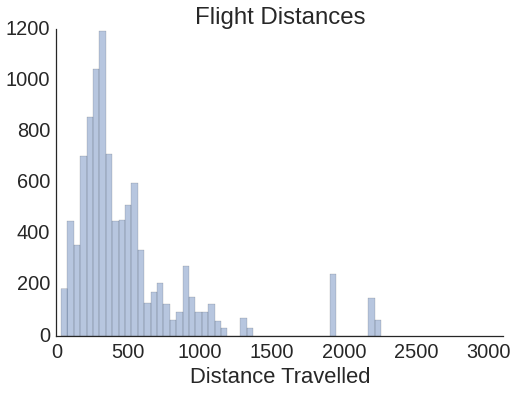

In [9]:
ax = sns.distplot(data['Distance'], kde=False)

ax.set(title='Flight Distances', \
       xlabel='Distance Travelled', xlim=(0, 3100))


sns.despine()

In [10]:
data[[0,1,2,16,17]][1000:1005]

,Year,Month,DayofMonth,Origin,Dest
1000,2001,1,13,PIT,IAD
1001,2001,1,14,PIT,IAD
1002,2001,1,15,PIT,IAD
1003,2001,1,16,PIT,IAD
1004,2001,1,17,PIT,IAD


In [11]:
data[['Year', 'Month', 'Origin']].head()

,Year,Month,Origin
0,2001,1,BWI
1,2001,1,BWI
2,2001,1,BWI
3,2001,1,BWI
4,2001,1,BWI


-----

We can extract data from a DataFrame into either a new DataFrame, or in
the case of single columns, into _numpy_ arrays. In the following code
block, we extract two columns, _DepDelay_ and _DepDelay_ and use them to
populate a scatter plot.

------

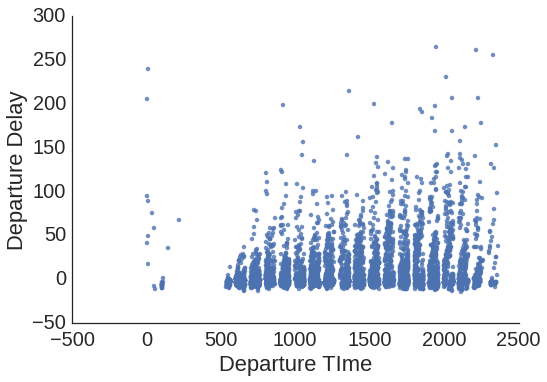

In [12]:
ax = sns.regplot(data=data[['DepTime','DepDelay']], \
            x='DepTime', y='DepDelay', fit_reg=False)

ax.set(xlabel='Departure TIme', ylabel='Departure Delay')

sns.despine()


-----

While this simple example was used to demonstrate column extraction, we
actually see an interesting trend. With this much data (imagine doing
this for the full data set), however, the trend can be difficult to
discern. We can easily modify this simple example to highlight any real
trend by binning the values directly. This is shown in the following
code block, where we bin these points into twenty bins, and also fit a
regression line and confidence interval.

-----

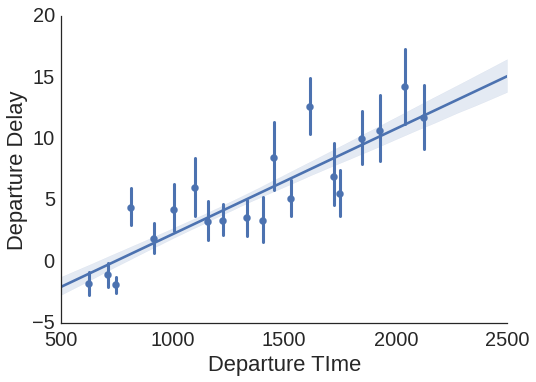

In [13]:
ax = sns.regplot(data=data[['DepTime','DepDelay']], \
            x='DepTime', y='DepDelay', x_bins = 20)

ax.set(xlabel='Departure TIme', ylabel='Departure Delay')

sns.despine()

-----

## Basic Data Processing

We can also perform simple data processing tasks on DataFrames including
computing basic statistics for columns, and identifying rows that hold
special field values. The most important Pandas function for these tasks
is the `describe` method, which provides summary information for the
columns in the DataFrame. In general, one simply calls this function on
the DataFrame of interest to display summary statistics for the
DataFrame, as demonstrated in the following code blocks. However, you
can also control what columns are analyzed (for example, ignore any text
columns) and what summary information is computer by using the `include`
and `percentiles` function arguments.

As shown below, the `describe` method lists the number of rows, the mean
value, the standard deviation, the minimum and maximum values, as well
as the 25, 50, and 75 percentiles.

-----

In [14]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,10000,10000,10000.000000,10000.000000,9629.000000,10000.000000,9611.000000,10000.000000,10000.000000,9611.000000,...,10000.000000,10000.000000,10000.000000,0,10000.00000,0,0,0,0,0
mean,2001,1,16.020000,3.763700,1352.098972,1348.933900,1478.952138,1479.475300,548.953600,100.196338,...,5.829200,15.503400,0.037100,NaN,0.00180,NaN,NaN,NaN,NaN,NaN
std,0,0,8.943847,1.996061,484.382785,475.068156,487.909338,479.801122,105.658225,54.168299,...,3.682959,9.536429,0.189016,NaN,0.04239,NaN,NaN,NaN,NaN,NaN
min,2001,1,1.000000,1.000000,1.000000,100.000000,1.000000,7.000000,375.000000,19.000000,...,0.000000,0.000000,0.000000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
25%,2001,1,8.000000,2.000000,927.000000,930.000000,1051.000000,1055.750000,464.000000,66.000000,...,4.000000,10.000000,0.000000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
50%,2001,1,16.000000,4.000000,1350.000000,1345.000000,1508.000000,1516.000000,534.000000,85.000000,...,5.000000,13.000000,0.000000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
75%,2001,1,24.000000,5.000000,1743.000000,1740.000000,1858.000000,1853.000000,633.000000,116.000000,...,7.000000,19.000000,0.000000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN
max,2001,1,31.000000,7.000000,2358.000000,2350.000000,2400.000000,2358.000000,746.000000,378.000000,...,50.000000,119.000000,1.000000,NaN,1.00000,NaN,NaN,NaN,NaN,NaN


In [15]:
# Here we dflip (ot Transpose) the matrix output for easier viwing
data[['DepTime','DepDelay']].describe(percentiles=[.2, .4, .6, .8]).T

,count,mean,std,min,20%,40%,50%,60%,80%,max
DepTime,9629,1352.098972,484.382785,1,824,1204,1350,1517,1838,2358
DepDelay,9629,5.243847,22.100930,-15,-5,-3,-2,-1,8,264


-----

We can also obtain the row (or column) index that holds the minimum or
maximum value by using the `idxmin` or `idxmax` functions, respectively.
These functions take the `axis` argument to specify if a row or column
index is desired. You can also find the `mode` or most frequently
occurring value by suing the `mode` function. These are demonstrated in
the following code block.

-----

In [16]:
data[['DepTime','DepDelay']].idxmin(axis=0)

DepTime     7393
DepDelay    5900
dtype: int64

In [17]:
data[['Origin','Distance']].mode()

,Origin,Distance
0,CLT,267


----- 

We can also [apply vectorized functions][pva] to one or more columns in a
DataFrame.  These functions may perform basic data processing tasks, like
dropping `NA` values or filling (i.e., replacing) `NA` values, or they
may be data analysis functions, like computing summary quantities or
mathematical expressions, as demonstrated in the following code block.

-----
[pva]: http://pandas.pydata.org/pandas-docs/version/0.16.2/basics.html#row-or-column-wise-function-application

In [18]:
data['Distance'].dropna().apply(lambda x: x * 1.609)[100:5000:500]

100      691.870
600     1243.757
1100     564.759
1600     693.479
2100     551.887
2600     251.004
3100     804.500
3600     352.371
4100     318.582
4600     429.603
Name: Distance, dtype: float64

-----

We can also perform basic operations in a vectorized manner, by
simplifying referring to the DataFrame columns. This includes all of the
basic mathematical operations (as long as the columns are of a suitable
data type). In this case, we can create new DataFrame objects by
indicating the columns on which to operate. The following code block
demonstrates this by displaying a histogram of the `arrival - departure`
times.

-----

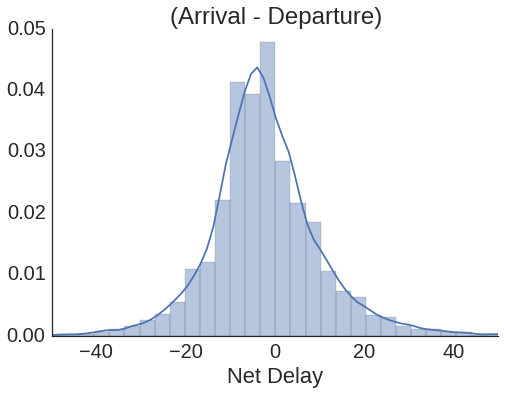

In [19]:
# This constructs a new Series

x = data['ArrDelay'] - data['DepDelay']

ax = sns.distplot(x.dropna())
ax.set(title='(Arrival - Departure)', \
       xlabel='Net Delay', xlim=(-50, 50))


sns.despine()

## Advanced Data Processing

The combination of Pandas and Seaborn provides a great deal of power and
flexibility when exploring a dataset. Both libraries are still under
development, so,  over time, new functionality will be added (and since
these are open source libraries, you can help). In this final section
in this Notebook, we will explore multiple columns for the full flight
data. 

First, we will read in the data (by default we use the same filename as
before), but now we select on the columns of interest by passing in a
`tuple` containing the column indices. We also specify names to use for
the columns, as opposed to the default information in the file header
row. We could also specify column data types, either directly or by
converting the columns after we have read in the data; but in this case
we have sufficient memory available so we can proceed with additional
analyses.

We now first look at the descriptive statistics for this new DataFrame
before selecting columns for visual exploration via a scatter plot. 

-----

In [20]:
# Read select columns for all rows.

ucs = (1, 2, 4, 14, 15, 16, 17, 18)
cnms = ['Month', 'Day', 'dTime', 'aDelay', 'dDelay', 'Depart', 'Arrive', 'Distance']

%time alldata = pd.read_csv(filename, header=0, na_values=['NA'], \
                         usecols=ucs, names=cnms)

alldata.memory_usage(index=True)

CPU times: user 4.33 s, sys: 1.54 s, total: 5.87 s
Wall time: 6.8 s


Index       47742240
Month       47742240
Day         47742240
dTime       47742240
aDelay      47742240
dDelay      47742240
Depart      47742240
Arrive      47742240
Distance    47742240
dtype: int64

In [31]:
!free -m

             total       used       free     shared    buffers     cached
Mem:          2002        923       1079          5         15         70
-/+ buffers/cache:        836       1166
Swap:         1418        190       1227


In [21]:
alldata.describe()

,Month,Day,dTime,aDelay,dDelay,Distance
count,5967780.000000,5967780.000000,5736582.000000,5723673.000000,5736582.000000,5967780.000000
mean,6.306294,15.683204,1348.704605,5.528249,8.154837,733.029305
std,3.371688,8.775346,482.686013,31.429291,28.348469,574.071625
min,1.000000,1.000000,1.000000,-1116.000000,-204.000000,21.000000
25%,3.000000,8.000000,930.000000,-9.000000,-3.000000,313.000000
50%,6.000000,16.000000,1333.000000,-2.000000,0.000000,571.000000
75%,9.000000,23.000000,1740.000000,10.000000,6.000000,980.000000
max,12.000000,31.000000,2400.000000,1688.000000,1692.000000,4962.000000


----

One of the first things to notice from the statistical description of
`alldata` is that the count values vary. Generally, this is the result
of specific columns having `null` or `NA` values. Before doing
sophisticated analyses, we will want to either drop those rows or
replace this missing data with values. For simplicity, we will simply
drop any row that holds missing data, since there are so few, by using
the `dropna` method.

We demonstrate this in the next code cell, where we display a scatter
plot between departure and arrival delays. In this example, we apply
several column filters, first we restrict our data to only those rows
with departure delays in excess of five minutes, as well as to only
flights that took place on either Thursday or Friday. We also use the
returned `ax` object to easily assign labels and restrict the plotting
range.

----

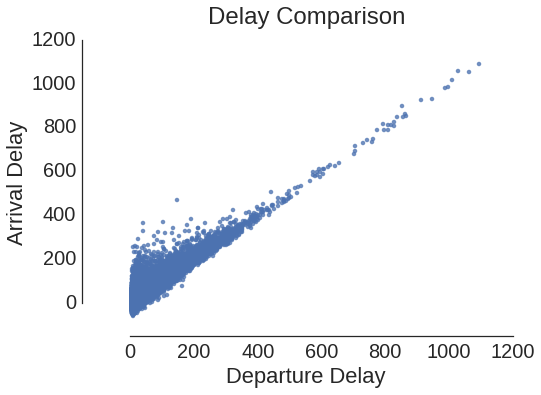

In [22]:
# Make a scatter plot that is colored by day.
# Also fit a linear regression to each day.

ax = sns.regplot('dDelay', 'aDelay', 
                 alldata[(alldata.dDelay > 5) & 
                         ((alldata.Day == 5) | (alldata.Day == 6))].dropna(), 
                 fit_reg=False)


ax.set(title='Delay Comparison',
       xlabel='Departure Delay', xlim=(-150, 1250),
       ylabel='Arrival Delay', ylim=(-150, 1250))

sns.despine(offset=0, trim=True)


-----
### Data Science Exploration

We now have sufficient skill to ask he following quesiton of our data.

> What is a typical departure delay at a particular airport as a
> function of day of the year?

To answer this question, we need to further restrict our data.

1. We need to cut our data to only flights departing  a chosen airport.
2. We need to drop nulls.
3. We need to construct a pivot table on Month and day of month.

In the next few code blocks, we complete these steps. First, we cut out
the data for a particular airport, in this case we use O'Hare airport,
but this can easily be changed to LAX or JFK. At this time, we also drop
rows with missing data. Next, we group the data together by month and
day of the month, and create a Data Frame that has a [statistical
measure][sm] (below we use the mean absolute deviation) for each column.
Finally, we create a _pivot table_ for the departure delay based on
month and day of month. At each step, we display the data or summary
description in order to ensure that the data are as expected, before
plotting a heat map of the resulting pivot table for the departure delay.

-----
[sm]: http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

In [23]:
local = alldata.loc[alldata['Depart'] == 'ORD'].dropna()
local.describe()

,Month,Day,dTime,aDelay,dDelay,Distance
count,321784.000000,321784.000000,321784.000000,321784.000000,321784.000000,321784.000000
mean,6.354067,15.714224,1386.255721,8.916938,11.812635,769.109138
std,3.382844,8.850686,466.639178,36.284050,31.590608,524.643619
min,1.000000,1.000000,1.000000,-67.000000,-43.000000,67.000000
25%,3.000000,8.000000,1004.000000,-10.000000,-2.000000,334.000000
50%,6.000000,16.000000,1356.000000,-1.000000,0.000000,678.000000
75%,9.000000,23.000000,1811.000000,14.000000,11.000000,925.000000
max,12.000000,31.000000,2400.000000,1473.000000,1477.000000,4243.000000


-----

All columns have the same number of rows, thus we can proceed with the
construction of our pivot table. First, we group the data by the two
columns of interest (you can display the intermediate DataFrame `df` to
see how the data has been grouped), after which we create a new
DataFrame where the values are the mean absolute deviation of the
grouped rows. 

-----

In [30]:
# Lets make a Pivot Table

# First we group the data by Month and Day
df = local.groupby(['Month', 'Day'])
dd = df.mad()
dd.head()

Distance     aDelay     dDelay       dTime
Month Day                                              
1     1    416.984511  24.740340  22.141739  404.383438
      2    408.966114  25.522352  21.076491  417.916617
      3    412.921131  31.862726  27.756608  421.444814
      4    405.789123  19.321280  16.037627  412.750594
      5    416.462791  24.355926  20.856139  425.332188

In [25]:
dd.reset_index(inplace=True)  
dd['dDelay'] = dd['dDelay'].astype(np.int16)

# Now we pivot the DataFrame to make a Matrix with values encoded.
dp = dd.pivot('Month', 'Day', 'dDelay')
dp.head()

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
1,22,21,27,16,20,9,12,11,11,10,...,7,8,15,9,25,10,15,25,14,11
2,13,12,9,18,11,8,16,28,28,12,...,23,12,45,45,12,13,16,NaN,NaN,NaN
3,14,12,11,13,8,9,8,16,13,12,...,14,13,11,18,13,8,9,12,15,9
4,13,10,14,10,43,58,53,16,18,19,...,28,59,11,9,9,9,7,11,9,NaN
5,7,9,11,11,7,16,33,9,9,30,...,19,23,15,31,14,10,13,14,8,14


-----

Now that we have our Pivot Table that contins the mean absolute
deviation for flights binned by day of the month and month, we can
display the result by using a heatmap.

-----

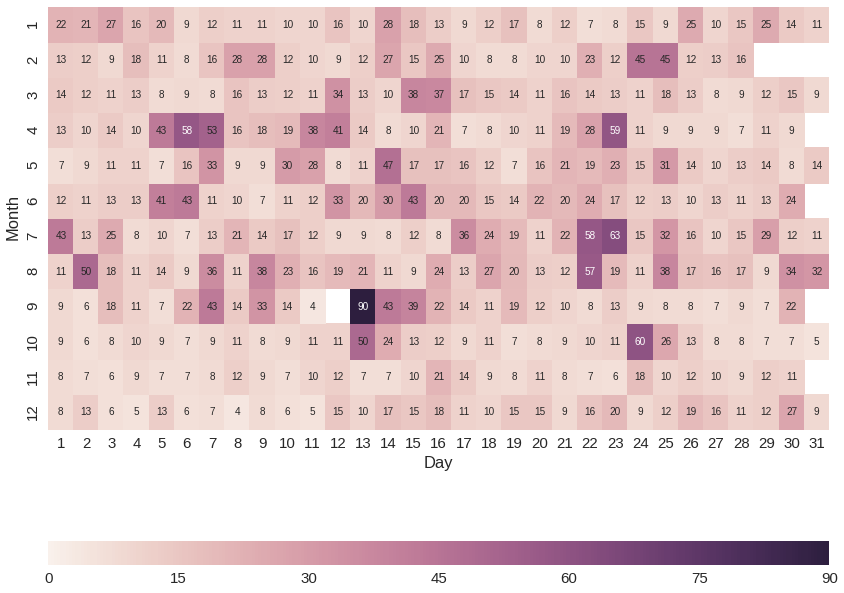

In [27]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .5}
ff, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(14, 10))

sns.set(rc={"xtick.direction": u'in'}, font_scale=1.25, style='white')


sns.heatmap(dp, ax=ax, annot=True, vmin=0, 
            cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})

plt.show()

-----

As with any visualization, you should ask yourself if the result makes
sense. 

- Why is the right edge of the figure jagged?
- Why is there a white square in the middle of the figure?
- Why is there a very dark square immediately afterwards?
- What are likely causes of the other peaks?

-----

## Breakout Session

During this breakout, you should gain experience working with Pandas to
explore data. Specific problems you can attempt include the following:

1. Use the `head` method to grab the first 1000 lines from the 2001
Airline data.

2. Remove the null or missing values from these rows.

3. Compute descriptive statistics for the first eight columns in the
first 1000 rows of this DataFrame by using the `describe` method.

Additional, more advanced problems:

1. Make a histogram of a different column in the flight data set.

2. Make a binned scatter plot of two other columns from the flight data
set.

2. Change the final heatmap demonstration to a different airport, like
'LAX'. How does the figure change?

3. Change the statistic used in the final heatmap to a different method
(such as mean, std, or others listed in the Pandas documentation). How
does the figure change?

As time permits, You can use the data stored on our JupyterHub server to
see how the figures in this Notebook change when analyzing a different
year.

-----

### Additional References

1. Offical [Pandas Documentation][pd]
2. [Pandas Book][pb] by Wes McKinney, creator of Pandas.
3. [Pandas Lessons][ul] from Practical Data Science Short Course



-----
[pd]: http://pandas.pydata.org/pandas-docs/stable/
[pb]: http://shop.oreilly.com/product/0636920023784.do
[ul]: https://github.com/ProfessorBrunner/rp-pdss15/blob/master/notebooks/4_intro2pandas.ipynb

### Return to the [Week One](index.ipynb) index.

-----